In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

mpg_df = pd.read_csv("car-mpg.csv")  

# drop the car name column as it is useless for the model
car_name = mpg_df['car_name']
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

## Clean the data

In [2]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the hp column from object / string type to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')  


In [3]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = mpg_df[mpg_df.columns[1:-1]]
y = mpg_df["mpg"]



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test_O, y_train, y_test_O = train_test_split(X, y, test_size=0.30, random_state=1)


print(X_train.shape)
print(X_test_O.shape)
print(y_test_O.shape)

(278, 6)
(120, 6)
(120,)


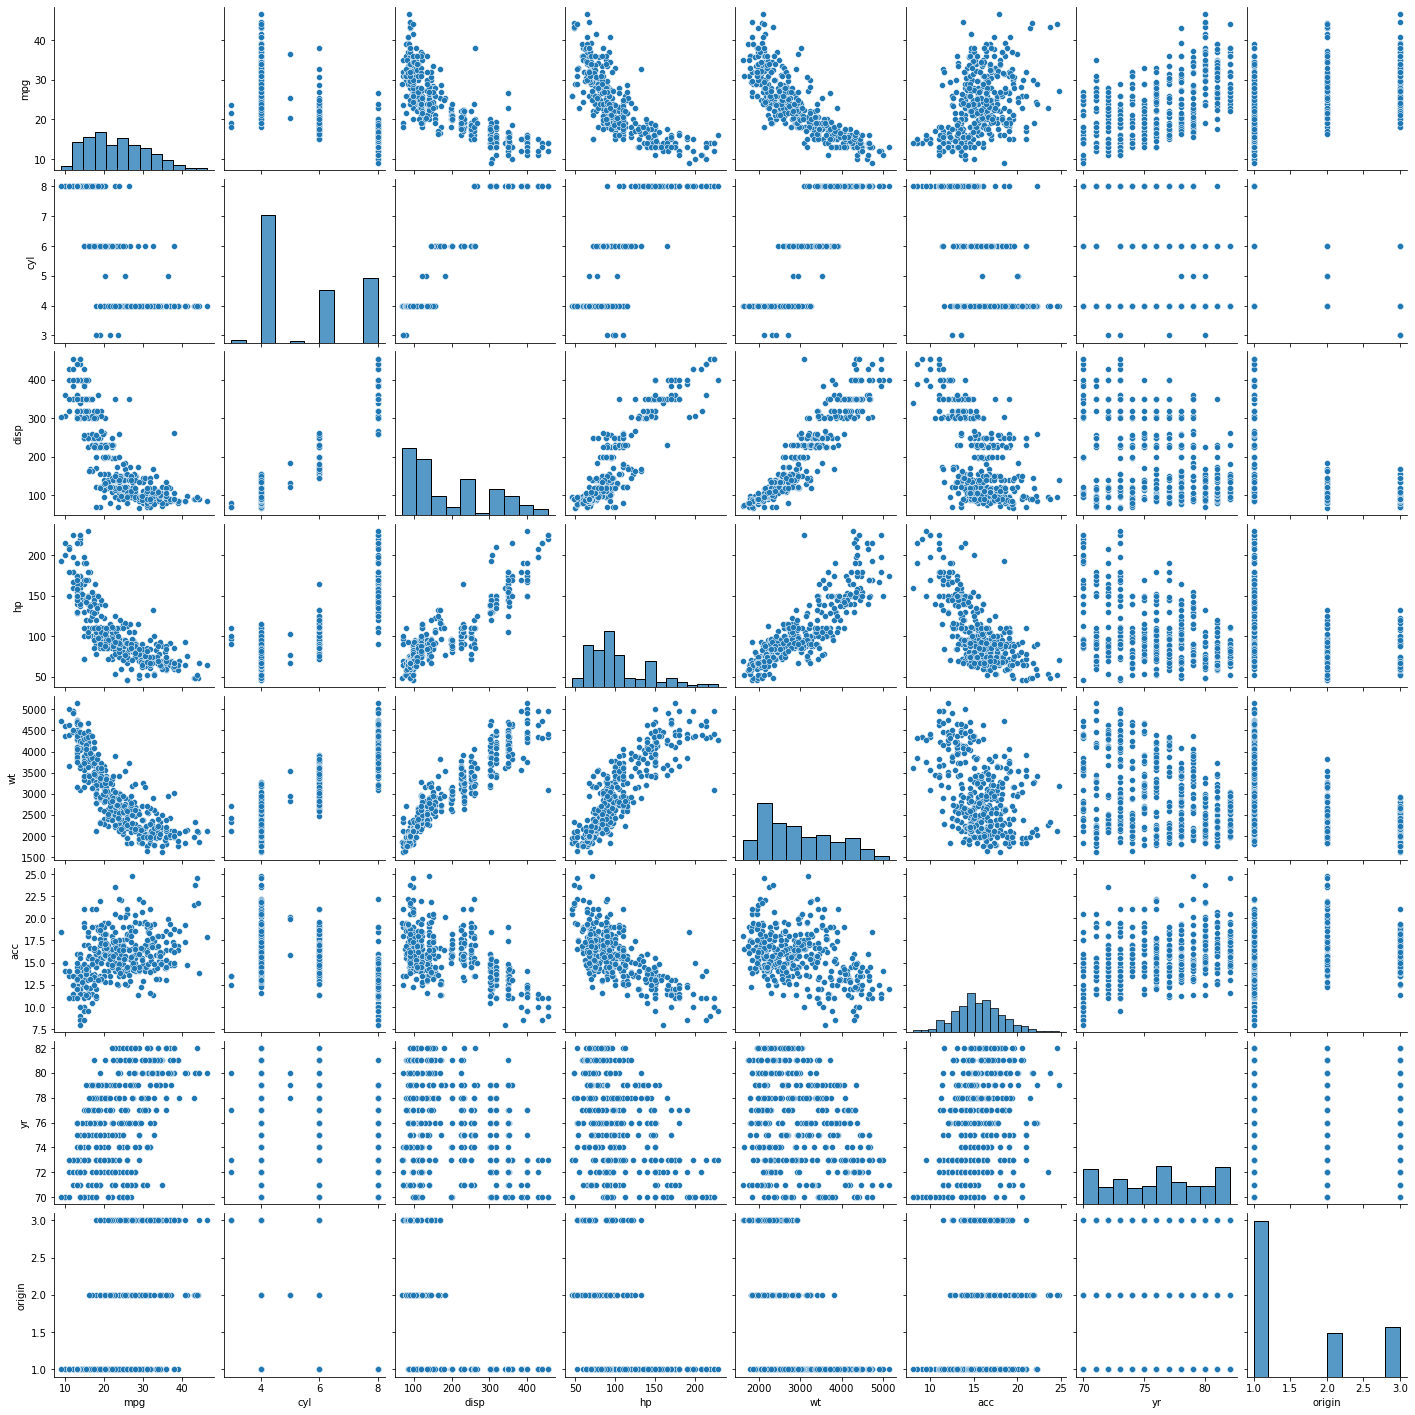

In [5]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

sns.pairplot(mpg_df) 
#sns.pairplot(mpg_df, diag_kind='kde') 

In [6]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)


Covariance Matrix 
%s [[ 1.00361011  0.95863099  0.8544826   0.89847166 -0.50494707 -0.35251336]
 [ 0.95863099  1.00361011  0.89032763  0.93969096 -0.53318543 -0.35855376]
 [ 0.8544826   0.89032763  1.00361011  0.87229407 -0.67547967 -0.38096256]
 [ 0.89847166  0.93969096  0.87229407  1.00361011 -0.4159673  -0.29284492]
 [-0.50494707 -0.53318543 -0.67547967 -0.4159673   1.00361011  0.26300053]
 [-0.35251336 -0.35855376 -0.38096256 -0.29284492  0.26300053  1.00361011]]


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.45908321 -0.13729529 -0.18395846 -0.6173215  -0.44719939  0.39430795]
 [-0.46990703 -0.13935911 -0.15899563 -0.25599819  0.80185742 -0.161172  ]
 [-0.46326918 -0.04550647  0.11788521  0.64612411  0.06869751  0.58925223]
 [-0.4488369  -0.22613229 -0.28667101  0.33701465 -0.37986356 -0.63824303]
 [ 0.32060949 -0.12720761 -0.8891415   0.14934617  0.0866508   0.24625704]
 [ 0.22263568 -0.94463782  0.23287308 -0.00442464  0.02265718  0.05770567]]

 Eigen Values 
%s [4.24912848 0.84644041 0.69035751 0.13592614 0.0323464  0.06746171]


In [8]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(4.249128476549149, array([-0.45908321, -0.46990703, -0.46326918, -0.4488369 ,  0.32060949,
        0.22263568])), (0.8464404117481394, array([-0.13729529, -0.13935911, -0.04550647, -0.22613229, -0.12720761,
       -0.94463782])), (0.6903575102099389, array([-0.18395846, -0.15899563,  0.11788521, -0.28667101, -0.8891415 ,
        0.23287308])), (0.1359261422804406, array([-0.6173215 , -0.25599819,  0.64612411,  0.33701465,  0.14934617,
       -0.00442464])), (0.0674617119680958, array([ 0.39430795, -0.161172  ,  0.58925223, -0.63824303,  0.24625704,
        0.05770567])), (0.032346397063734024, array([-0.44719939,  0.80185742,  0.06869751, -0.37986356,  0.0866508 ,
        0.02265718]))]
Eigenvalues in descending order: 
[4.249128476549149, 0.8464404117481394, 0.6903575102099389, 0.1359261422804406, 0.0674617119680958, 0.032346397063734024]


In [9]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%




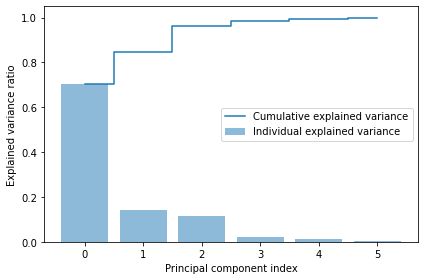

In [14]:
plt.bar(range(0,len(var_explained)), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_var_exp)), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [16]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y_train, test_size=test_size, random_state=seed)

In [ ]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

In [ ]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

In [ ]:
regression_model.intercept_

In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
# project the original test data into pc dimensions and check the performance

In [ ]:
X_test_std =  sc.fit_transform(X_test_O) 


X_test_std_4D = np.dot(X_test_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_test_df = pd.DataFrame(X_test_std_4D)  # converting array to dataframe for pairplot


print(X_test_std.shape)
print(X_test_std_4D.shape)
print(Proj_test_df.shape)

In [ ]:
regression_model.score(Proj_test_df, y_test_O)